# Python Exam
### Spencer Hirsch

**Question 1: Derive formulas for $f^{(n)}(0)$ for $e^x$ and $\frac{1}{1-x}$, and $f^{(n)}\left(\frac{\pi}{2}\right)$ for $\sin\left(x-\frac{\pi}{2}\right)$.**

**Function $f^{(n)} = e^x$.**

First Derivative: $f^{(n)\prime} = e^x$

Second Derivative: $f^{(n)\prime\prime} = e^x$

Third Derivative: $f^{(n)\prime\prime\prime} = e^x$

Nth derivate: $e^x$

There is a clear pattern defined when deriving $e^x$ of $e^x$.

Therefore, for the nth derivative of the function $e^x$ is $e^x$.

**Function $\frac{1}{1-x}$.**

First Derivative: $f^{(n)\prime}$ = $\frac{1}{(1-x)^2}$

Second Derivative: $f^{(n){\prime\prime}}$ = $\frac{2}{(1-x)^3}$

Third Derivative: $f^{(n){\prime\prime\prime}}$ = $\frac{6}{(1-x)^4}$

Nth Derivative: $\frac{n!}{(1-x)^{(n+1)}}$

**Function $f^{(n)} = sin(x - \frac{\pi}{2})$**


First Derivative: $f^{(n)\prime}$ = $cos(x - \frac{\pi}{2})$

Second Derivative: $f^{(n)\prime\prime}$ = $-sin(x - \frac{\pi}{2})$

Third Derivative: $f^{(n)\prime\prime\prime}$ = $-cos(x - \frac{\pi}{2})$

Fourth Derivative: $f^{(n)\prime\prime\prime\prime}$ = $sin(x - \frac{\pi}{2})$ 

$$
\begin{cases}
    cos(x - \frac{\pi}{2}) \text{,      if n mod 4 = 1} \\
    -sin(x - \frac{\pi}{2}) \text{,       if n mod 4 = 2} \\
    -cos(x - \frac{\pi}{2}) \text{,       if n mod 4 = 3} \\
    sin(x - \frac{\pi}{2}) \text{,       if n mod 4 = 0} \\
\end{cases}
$$

$$
\begin{cases}
    -1 \text{,      if n mod 4 = 0} \\
    0 \text{,       if n mod 4 = 1} \\
    1 \text{,       if n mod 4 = 2} \\
    0 \text{,       if n mod 4 = 3} \\
\end{cases}
$$

**Question 2: Write a Python function that outputs a Taylor polynomial of degree $n$ centered at $x=c$. The a function should take 5 inputs: a function $f$, a function $f^{(n)}$, the degree $n$ you want, a number $c$ for where the polynomial is centered, and a number $x$ where you want to compute it.**

 **Demonstrate your Python function runs for $e^x$ and $\frac{1}{1-x}$ centered at 0, and $\sin\left(x-\frac{\pi}{2}\right)$ centered at $\pi/2$. Show it works for a variety of $x$ and $n$ inputs.**


In [178]:
import math 
import random

def tay_pol(func, func_n, n, c, x):
    sum = 0                         # Initialize sum to 0.
    for i in range (0, (n + 1)):
        if i == 0:                  # For first iteration of loop.
            sum += func(c)
        else:
            if c == math.pi/2:      # Used to determine the nth derivative if the given function is for sin(x-pi/2)
                if i % 4 == 0:
                    func_n = lambda i, x: math.sin(x - (math.pi/2))
                elif i % 4 == 1:
                    func_n = lambda i, x: math.cos(x - (math.pi/2))
                elif i % 4 == 2:
                    func_n = lambda i, x : -math.sin(x - (math.pi/2))
                elif i % 4 == 3:
                    func_n = lambda i, x : -math.cos(x - (math.pi/2))     
            sum += (func_n(i, c) * (x - c) ** i) / math.factorial(i)    # Add nth derivative solution to total sum
    return sum

'''
The following code is used to show for different test cases per function for the function written to answer question 2
of the assignment. I have chose random values over a range in attempt to show the functionality of the function.
'''

print("Demonstration of function e^x")
print()
print(tay_pol(lambda x: math.exp(x), lambda n, x: math.exp(x), 1, 0, 7))
print(tay_pol(lambda x: math.exp(x), lambda n, x: math.exp(x), 7, 0, 2))
print(tay_pol(lambda x: math.exp(x), lambda n, x: math.exp(x), 12, 0, 1))
print(tay_pol(lambda x: math.exp(x), lambda n, x: math.exp(x), 50, 0, 2))

print()
print("Demonstration of function 1/1-x")
print()
print(tay_pol(lambda x : 1 / (1-x), lambda n, x : math.factorial(n) / ((1-x) ** (n+1)), 1, 0, 1))
print(tay_pol(lambda x : 1 / (1-x), lambda n, x : math.factorial(n) / ((1-x) ** (n+1)), 7, 0, 4))
print(tay_pol(lambda x : 1 / (1-x), lambda n, x : math.factorial(n) / ((1-x) ** (n+1)), 16, 0, 5))
print(tay_pol(lambda x : 1 / (1-x), lambda n, x : math.factorial(n) / ((1-x) ** (n+1)), 30, 0, 11))

print()
print("Demonstration of function sin(x-pi/2)")
print()
func = lambda x: math.sin(x - (math.pi/2))
func_n = lambda i, x: math.sin(i * math.pi/2)
print(tay_pol(func, func_n, 1, math.pi/2, 2)) 
print(tay_pol(func, func_n, 1, math.pi/2, 3)) 
print(tay_pol(func, func_n, 1, math.pi/2, 4)) 
print(tay_pol(func, func_n, 18, math.pi/2, 7)) 



Demonstration of function e^x

8.0
7.3809523809523805
2.7182818282861687
7.389056098930649

Demonstration of function 1/1-x

2.0
21845.0
190734863281.0
1.9194342495775046e+31

Demonstration of function sin(x-pi/2)

0.42920367320510344
1.4292036732051034
2.4292036732051034
-0.7532022417945543


**Question 3: Derive a numerical upper bound for the remainder term $\max\limits_{t\in(c,x)}\left|\frac{f^{(n+1)}(t)}{n!}(x-t)^n(x-c)\right|$ for $f(x)=e^x$ with $c=0$; for $\frac{1}{1-x}$ with $c=0$; and for $\sin\left(x-\frac{\pi}{2}\right)$ with $c=\frac{\pi}{2}$.**

**Function $e^x$ where $c=0$**

$f^{(n+1)}(t) = e^t$ 

$\max\limits_{t\in(c,x)}\left|\frac{e^{t}}{n!}(x-t)^n(x-c)\right|$ 

$\frac{x-c}{n!}\max\limits_{t\in(c,x)}\left|e^{t}(x-t)^n\right|$ 

$\frac{x-c}{n!}\max\limits_{t\in(c,x)}\left|e^{t}\right|\max\limits_{t\in(c,x)}\left|(x-t)^n\right|$ 

Maximum can be acheived when $t=x$.

$\frac{x-c}{n!} * e^x * x^n = \frac{e^xx^{(n+1)}}{n!}$



**Function $\frac{1}{1-x}$ where $c=0$**

$f^{(n+1)}(t) = \frac{(n+1)!}{(1-t)^{(n+2)}}$ 

$\max\limits_{t\in(c,x)}\left|\frac{\frac{(n+1)!}{(1-t)^{(n+2)}}}{n!}(x-t)^n(x-c)\right|$ 

$\frac{x}{n!}\max\limits_{t\in(c,x)}\left|\frac{(n+1)!}{(1-t)^{(n+2)}}(x-t)^n\right|$ 

$\frac{x}{n!}\max\limits_{t\in(c,x)}\left|\frac{(n+1)!}{(1-t)^{(n+2)}}\right|\max\limits_{t\in(c,x)}\left|(x-t)^n\right|$ 

Maximum can be acheived when $t=0$ when equation is split.

$\frac{x}{n!}*(n+1)!*x^n = \frac{x^{n+1}(n+1)!}{n!} = x^{n+1}(n+1)$

**Function $sin(x-\frac{\pi}{2})$ where $c=\frac{\pi}{2}$**



We can assume that the maximum of the sin function is $1$ due to the piece-wise function:

$$
\begin{cases}
    -1 \text{,      if n mod 4 = 0} \\
    0 \text{,       if n mod 4 = 1} \\
    1 \text{,       if n mod 4 = 2} \\
    0 \text{,       if n mod 4 = 3} \\
\end{cases}
$$

With this being the case we can set up our function to be:

$\max\limits_{t\in(c,x)}\left|\frac{1}{n!}(x-t)^n(x-c)\right|$ 

$\frac{(x-c)}{n!}\max\limits_{t\in(c,x)}\left|(x-t)^n\right|$ 

$\frac{x-\frac{\pi}{2}}{n!} * (x-\frac{\pi}{2})^n$

$=\frac{(x-\frac{\pi}{2})^{(n+1)}}{n!}$





**Question 4: Write a Python function that computes a Taylor polynomial up to whatever degree ensures the error is bounded by $\varepsilon$ as per Taylor's Theorem. $\varepsilon$ will be an additional input to the function but $n$ will not be an input.**

**Demonstrate your Python function runs for  $e^x$ and $\frac{1}{1-x}$ centered at 0 and $\sin\left(x-\frac{\pi}{2}\right)$ centered at $\pi/2$. Show it works for a variety of $x$ and $\varepsilon$ inputs.**


In [190]:
'''
Function to find nth degree to compute Taylor Polynomial such that the error is bounded by
Epsilon. Once, n is determined call the tay_pol function from question 2 to compute the value.
'''

import sys

# Function to find value of n and call tay_pol function from question 2.
def find_error(func, func_n, func_max, eps, c, x):
    n = 1                               # Initialize n to 1.
    max_error = sys.maxsize             # initialize max_error to max integer.
    
    while max_error > eps:              # Iterate until max_error is greater than epsilon.
        max_error = func_max(n, x)
        n += 1

    # Format output for user.
        
    print("When epsilon is %s and x is %s" % (eps, x))
    print("N: " + str(n-1), end='')
    print(", the Taylor Polynomial is " + str(tay_pol(func, func_n, n-1, c, x)))
    print()

'''
The following code is used to test the above function.

Initialize the lambda functions for each original function, the nth derivative, and the max error function found
in question 3.
'''

func = lambda x: math.exp(x)
func_n = lambda n, x: math.exp(x)
func_max = lambda n, x: abs((math.exp(x) * (x ** (n + 1))) / math.factorial(n))
print("Demonstration of function e^x")
find_error(func, func_n, func_max, 1e-05, 0, 0.3)
find_error(func, func_n, func_max, 1e-06, 0, 0.3)
find_error(func, func_n, func_max, 2e-08, 0, 0.6)
find_error(func, func_n, func_max, 3e-06, 0, 0.6)
find_error(func, func_n, func_max, 1e-06, 0, 0.2)



func = lambda x : 1 / (1-x)
func_n = lambda n, x : math.factorial(n) / ((1-x) ** (n+1))
func_max = lambda n, x: abs((x ** (n+1)) * (n+1))
print()
print("Demonstration of function 1/1-x")
find_error(func, func_n, func_max, 1e-05, 0, 0.3)
find_error(func, func_n, func_max, 1e-06, 0, 0.3)
find_error(func, func_n, func_max, 2e-08, 0, 0.6)
find_error(func, func_n, func_max, 3e-06, 0, 0.6)
find_error(func, func_n, func_max, 1e-06, 0, 0.2)


func = lambda x : math.sin(x - math.pi/2)
func_n = lambda n, x: math.sin(n * math.pi/2)
func_max = lambda n, x: abs(((x-math.pi/2) ** (n+1)) / math.factorial(n))
print()
print("Demonstration of function sin(x - pi/2)")
find_error(func, func_n, func_max, 1e-05, 0, 0.3)
find_error(func, func_n, func_max, 1e-06, 0, 0.3)
find_error(func, func_n, func_max, 2e-08, 0, 0.6)
find_error(func, func_n, func_max, 3e-06, 0, 0.6)
find_error(func, func_n, func_max, 1e-06, 0, 0.2)


Demonstration of function e^x
When epsilon is 1e-05 and x is 0.3
N: 5, the Taylor Polynomial is 1.34985775

When epsilon is 1e-06 and x is 0.3
N: 6, the Taylor Polynomial is 1.3498587625

When epsilon is 2e-08 and x is 0.6
N: 10, the Taylor Polynomial is 1.8221188002948572

When epsilon is 3e-06 and x is 0.6
N: 8, the Taylor Polynomial is 1.822118770857143

When epsilon is 1e-06 and x is 0.2
N: 5, the Taylor Polynomial is 1.2214026666666666


Demonstration of function 1/1-x
When epsilon is 1e-05 and x is 0.3
N: 11, the Taylor Polynomial is 1.4285706693700002

When epsilon is 1e-06 and x is 0.3
N: 13, the Taylor Polynomial is 1.4285713602433003

When epsilon is 2e-08 and x is 0.6
N: 42, the Taylor Polynomial is 2.4999999992781556

When epsilon is 3e-06 and x is 0.6
N: 31, the Taylor Polynomial is 2.4999998010334727

When epsilon is 1e-06 and x is 0.2
N: 10, the Taylor Polynomial is 1.2499999744


Demonstration of function sin(x - pi/2)
When epsilon is 1e-05 and x is 0.3
N: 10, the Taylo

**Question 5: Use your code to compute values to make some plots for the following. [_Hint_: Learn to plot graphs with `matplotlib` for this.]**

**a. $P_{n,0,e^x}(x)$ on $[-5, 5]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=e^x$**

**b. $P_{n,0,\frac{1}{1-x}}(x)$ on $[-0.9, 0.9]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=\frac{1}{1-x}$**

**c. $P_{n,\frac{\pi}{2},\sin\left(x-\frac{\pi}{2}\right)}(x)$ on $\left[-\frac{\pi}{2}, \frac{3\pi}{2}\right]$ for $n=0, 1, 2, 3, 5, 10$ along with $f(x)=\sin\left(x-\frac{\pi}{2}\right)$**

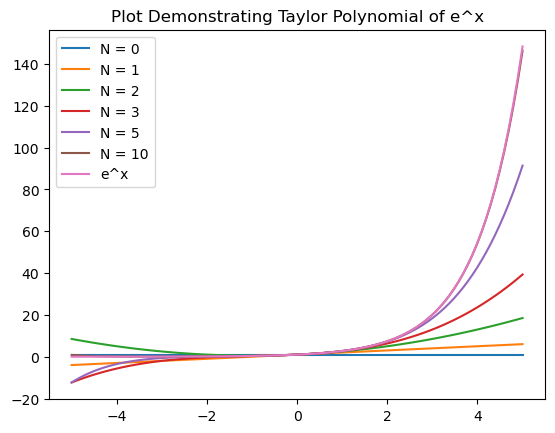

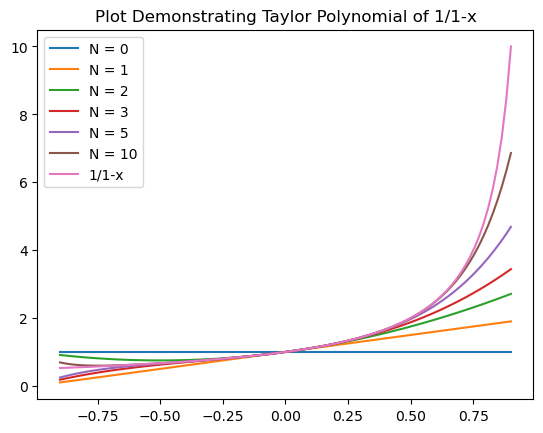

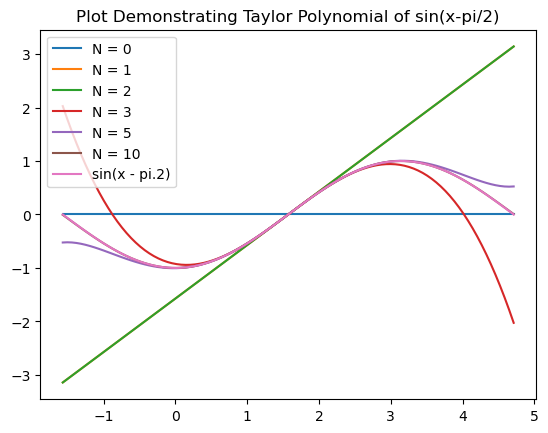

In [189]:
'''
Plotting the various functions laid out in question 5.
'''

import matplotlib.pyplot as plt
import numpy as np

# Plotting e^x
x_values = np.linspace(-5, 5, 100)          # Generate all x-values within given range.
func = lambda x: math.exp(x)                # Initialize function.
for n in [0, 1, 2, 3, 5, 10]:               # Iterate over all given n-values.
    y_values = [tay_pol(func, lambda n, x: math.exp(x), n, 0, x) for x in x_values]
    plt.plot(x_values, y_values, label='N = %d' % n)    # Plot x and y values for each n.

y_values = [func(x) for x in x_values]      # Plot original function for all x-values.
plt.plot(x_values, y_values, label="e^x") 
plt.title("Plot Demonstrating Taylor Polynomial of e^x")
plt.legend(loc='upper left')
plt.show()


# Remaining code follows the exact same structure as block above.

x_values = np.linspace(-0.9, 0.9, 100)
func = lambda x : 1 / (1-x)
for n in [0, 1, 2, 3, 5, 10]:
    y_values = [tay_pol(func, lambda n, x : math.factorial(n) / ((1-x) ** (n+1)), n, 0, x) for x in x_values]
    plt.plot(x_values, y_values, label='N = %d' % n)

y_values = [func(x) for x in x_values]
plt.plot(x_values, y_values, label="1/1-x")
plt.title("Plot Demonstrating Taylor Polynomial of 1/1-x")
plt.legend(loc='upper left')
plt.show()


x_values = np.linspace(-math.pi/2, 3*math.pi/2, 100)
func = lambda x: math.sin(x - (math.pi/2))
for n in [0, 1, 2, 3, 5, 10]:
    y_values = [tay_pol(func, lambda i, x: math.sin(i * math.pi/2), n, math.pi/2, x) for x in x_values]
    plt.plot(x_values, y_values, label='N = %d' % n)

y_values = [func(x) for x in x_values]
plt.plot(x_values, y_values, label="sin(x - pi.2)")
plt.title("Plot Demonstrating Taylor Polynomial of sin(x-pi/2)")
plt.legend(loc='upper left')
plt.show()